In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.model_selection import train_test_split
path = "/content/drive/MyDrive/Colab Notebooks/Data/ObesityDataSet_raw_and_data_sinthetic_shuffled.csv"

In [ ]:
def init(path):
  df = pd.read_csv(path)
  return df
df = init(path)


In [ ]:
df.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,23.365041,1.744319,133.452490,yes,yes,3.000000,3.000000,Sometimes,no,2.839069,no,1.231031,0.792496,Sometimes,Public_Transportation,Obesity_Type_III
1,Male,19.565496,1.705584,78.025625,yes,no,1.936479,2.837388,Sometimes,no,2.159987,no,1.475772,0.646514,Sometimes,Public_Transportation,Overweight_Level_II
2,Female,26.000000,1.626503,110.818757,yes,yes,3.000000,3.000000,Sometimes,no,2.708927,no,0.000000,0.278962,Sometimes,Public_Transportation,Obesity_Type_III
3,Female,23.000000,1.665199,83.151150,yes,yes,2.928234,1.458507,Sometimes,no,2.777379,no,0.354541,1.707018,no,Public_Transportation,Obesity_Type_I
4,Male,17.729923,1.732862,51.216463,no,yes,2.051283,2.645858,Sometimes,no,2.357520,no,0.291309,0.897942,Sometimes,Public_Transportation,Insufficient_Weight


In [ ]:
df.columns


Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [ ]:
df.duplicated().sum()

24

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [ ]:
attributes = ['Gender','Age','Height','Weight','family_history_with_overweight','FAVC','FCVC',
              'NCP','CAEC','SMOKE','CH2O','SCC','FAF','TUE','CALC','MTRANS','NObeyesdad']
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

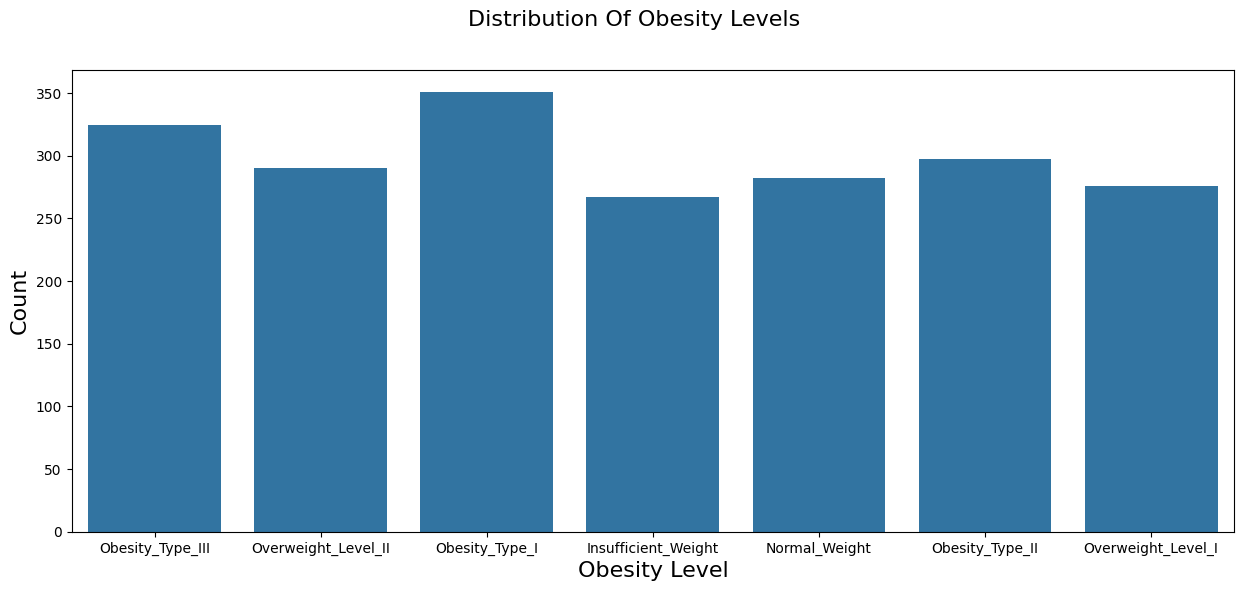

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='NObeyesdad')
plt.xlabel('Obesity Level', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.suptitle('Distribution Of Obesity Levels', fontsize = 16)
plt.show()

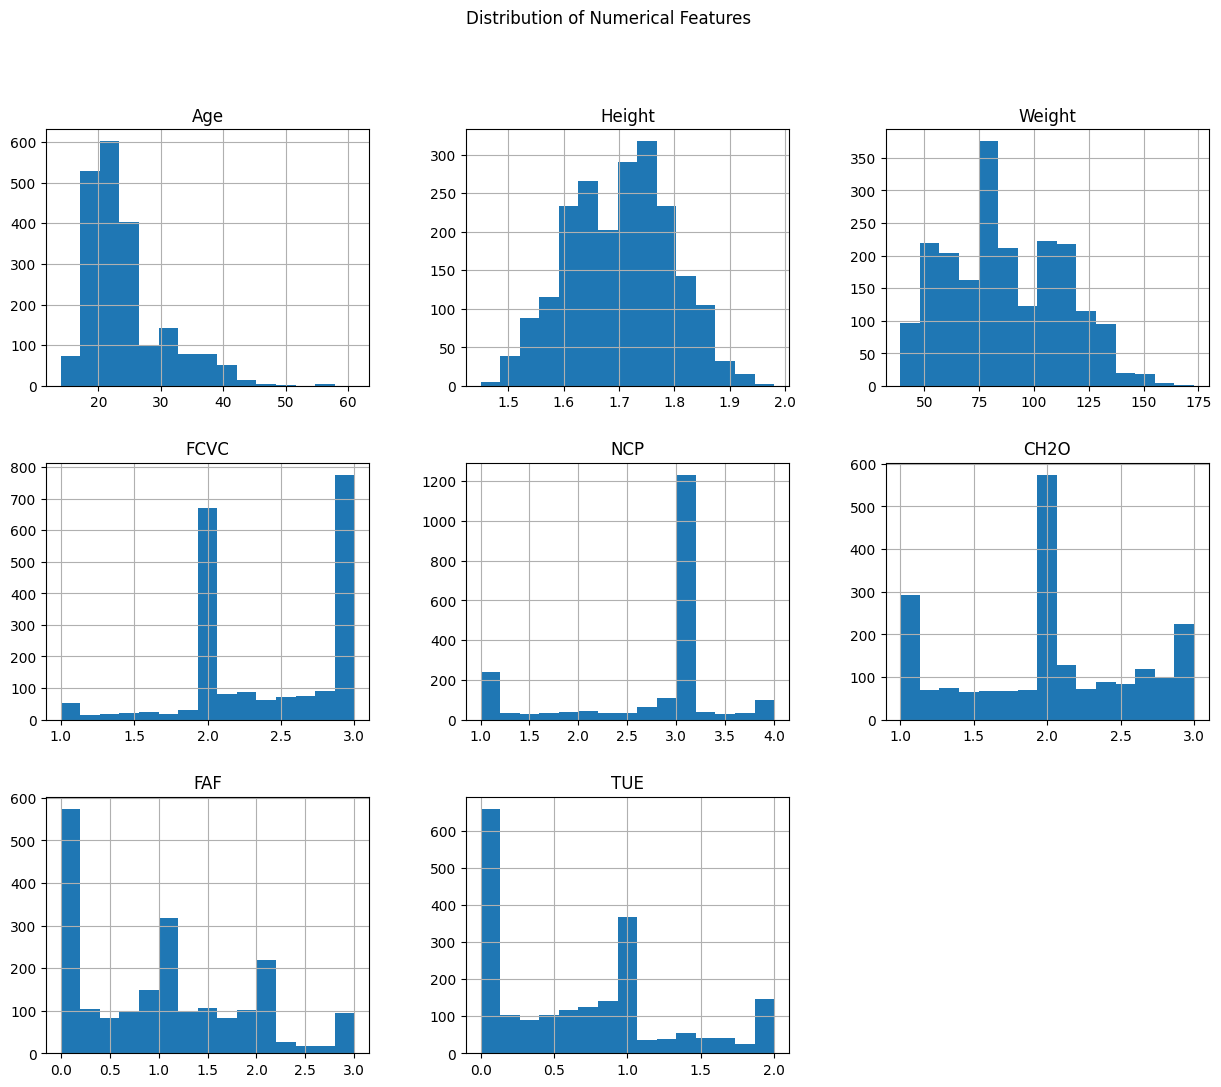

In [ ]:
df[numerical_features].hist(bins=15, figsize=(15, 12), layout=(3, 3))
plt.suptitle('Distribution of Numerical Features')
plt.xlabel("value")
plt.ylabel("value")
plt.show()


                               Feature  Importance
2                               Weight    0.284237
0                                  Age    0.090829
1                               Height    0.084395
3                                 FCVC    0.081577
4                                  NCP    0.050915
7                                  TUE    0.045520
5                                 CH2O    0.043754
6                                  FAF    0.042958
12                       Gender_Female    0.036042
13                         Gender_Male    0.034989
16                      CALC_Sometimes    0.021897
25   family_history_with_overweight_no    0.021548
26  family_history_with_overweight_yes    0.021485
10                      CAEC_Sometimes    0.019478
17                             CALC_no    0.019344
9                      CAEC_Frequently    0.017323
23        MTRANS_Public_Transportation    0.016029
20                   MTRANS_Automobile    0.014045
30                            F

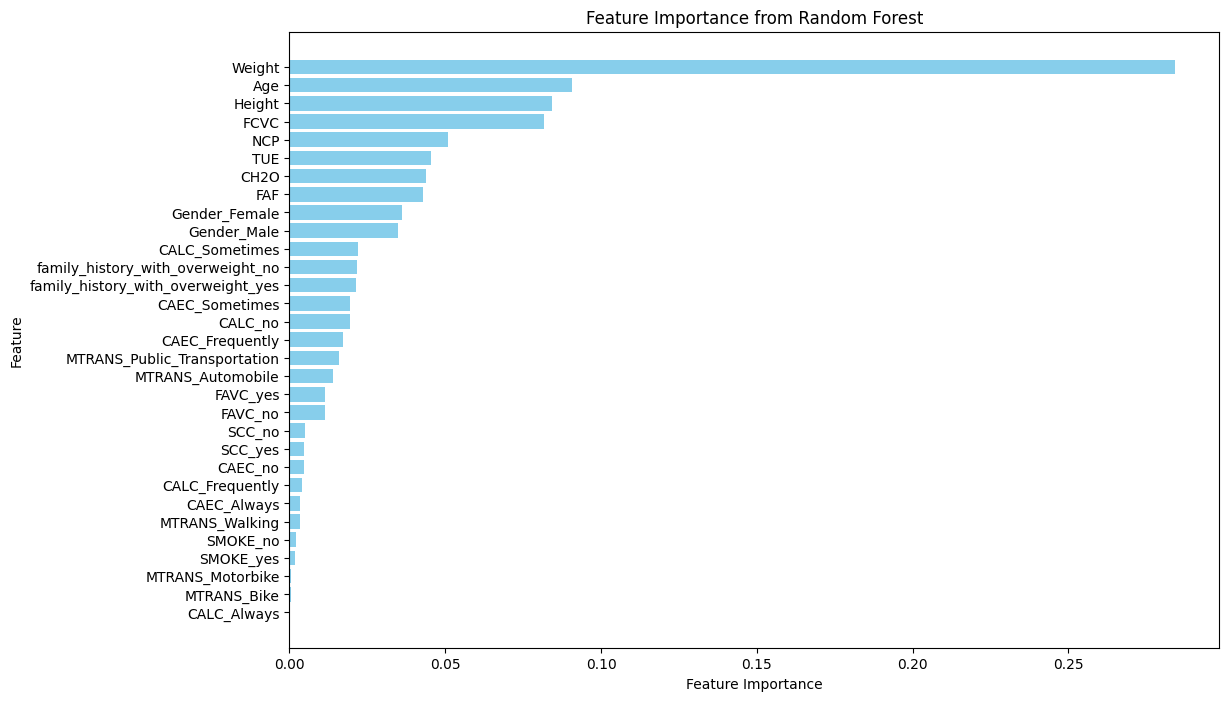

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def compute_feature_importance(X, y, feature_names):
    rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)
    rf_model.fit(X, np.argmax(y, axis=1))

    importance = rf_model.feature_importances_

    importance_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importance
    }).sort_values(by="Importance", ascending=False)

    return importance_df

numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

categorical_features = encoder.get_feature_names_out(encoder.feature_names_in_)
feature_names = numerical_features + list(categorical_features)

plt.figure(figsize=(12, 8))
plt.barh(importance_df["Feature"], importance_df["Importance"], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance from Random Forest")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import pickle

def load_and_preprocess_data_with_BMI(path, important_columns):
    data = pd.read_csv(path)

    data['BMI'] = data['Weight'] / (data['Height'] ** 2)
    data = data[important_columns + ['NObeyesdad', 'BMI']]

    categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'CALC', 'MTRANS']
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded_cats = encoder.fit_transform(data[categorical_columns])

    encoded_cat_columns = encoder.get_feature_names_out(categorical_columns)
    encoded_df = pd.DataFrame(encoded_cats, columns=encoded_cat_columns)

    data = pd.concat([data.drop(columns=categorical_columns), encoded_df], axis=1)

    label_encoder = OneHotEncoder(sparse_output=False)
    y = label_encoder.fit_transform(data[['NObeyesdad']])
    X = data.drop(columns=['NObeyesdad']).values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    return X, y, scaler, encoder, label_encoder

In [ ]:
class MLP:
    def __init__(self, layer_dims, activations, learning_rate=0.03, lambd=0.01, keep_probs=None):
        self.layer_dims = layer_dims
        self.activations = activations
        self.learning_rate = learning_rate
        self.lambd = lambd
        self.keep_probs = keep_probs if keep_probs else [1.0] * (len(layer_dims) - 1)
        self.parameters = self.initialize_parameters()
        self.initial_learning_rate = learning_rate

    def initialize_parameters(self):
        parameters = {}
        for l in range(1, len(self.layer_dims)):
            parameters[f'W{l}'] = np.random.randn(self.layer_dims[l], self.layer_dims[l - 1]) * 0.02
            parameters[f'b{l}'] = np.zeros((self.layer_dims[l], 1))
        return parameters

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def relu(self, Z):
        return np.maximum(0, Z)

    def relu_derivative(self, Z):
        return Z > 0

    def softmax(self, Z):
        expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
        return expZ / expZ.sum(axis=0, keepdims=True)

    def compute_loss(self, Y, Y_hat):
        m = Y.shape[1]
        cross_entropy_loss = -np.sum(Y * np.log(Y_hat + 1e-8)) / m
        L2_regularization = (self.lambd / (2 * m)) * sum(
            np.sum(np.square(self.parameters[f'W{l}'])) for l in range(1, len(self.parameters) // 2 + 1)
        )
        return cross_entropy_loss + L2_regularization

    def forward_propagation(self, X):
        caches = {}
        A = X.T
        caches['A0'] = A
        L = len(self.parameters) // 2
        for l in range(1, L + 1):
            W = self.parameters[f'W{l}']
            b = self.parameters[f'b{l}']
            Z = W @ A + b
            if self.activations[l - 1] == "relu":
                A = self.relu(Z)
                if l < L:
                    D = np.random.rand(*A.shape) < self.keep_probs[l - 1]
                    A = A * D / self.keep_probs[l - 1]
                    caches[f'D{l}'] = D
            elif self.activations[l - 1] == "sigmoid":
                A = self.sigmoid(Z)
            elif self.activations[l - 1] == "softmax":
                A = self.softmax(Z)
            caches[f'Z{l}'] = Z
            caches[f'A{l}'] = A
        return A, caches

    def backward_propagation(self, X, Y, caches):
        grads = {}
        m = X.shape[0]
        L = len(self.parameters) // 2
        dZ = caches[f'A{L}'] - Y.T
        for l in range(L, 0, -1):
            grads[f'dW{l}'] = (1 / m) * dZ @ caches[f'A{l-1}'].T + (self.lambd / m) * self.parameters[f'W{l}']
            grads[f'db{l}'] = (1 / m) * np.sum(dZ, axis=1, keepdims=True)
            if l > 1:
                dA_prev = self.parameters[f'W{l}'].T @ dZ
                dZ = dA_prev * self.relu_derivative(caches[f'Z{l-1}'])
        return grads

    def update_parameters(self, grads):
        L = len(self.parameters) // 2
        for l in range(1, L + 1):
            self.parameters[f'W{l}'] -= self.learning_rate * grads[f'dW{l}']
            self.parameters[f'b{l}'] -= self.learning_rate * grads[f'db{l}']

    def train(self, X_train, y_train, X_val, y_val, epochs, batch_size=16, early_stop_patience=10):
        train_loss_history = []
        val_loss_history = []
        best_val_loss = float('inf')
        patience_counter = 0

        for epoch in range(epochs):
            permutation = np.random.permutation(X_train.shape[0])
            X_train = X_train[permutation]
            y_train = y_train[permutation]

            for i in range(0, X_train.shape[0], batch_size):
                X_batch = X_train[i:i + batch_size]
                y_batch = y_train[i:i + batch_size]

                Y_hat, caches = self.forward_propagation(X_batch)
                grads = self.backward_propagation(X_batch, y_batch, caches)
                self.update_parameters(grads)

            Y_hat_train, _ = self.forward_propagation(X_train)
            Y_hat_val, _ = self.forward_propagation(X_val)

            train_loss = self.compute_loss(y_train.T, Y_hat_train)
            val_loss = self.compute_loss(y_val.T, Y_hat_val)

            train_loss_history.append(train_loss)
            val_loss_history.append(val_loss)

            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_counter = 0
                self.save_model("/content/drive/MyDrive/Colab Notebooks/Modal/Multiple_peceptron.pkl")
            else:
                patience_counter += 1

            if patience_counter >= early_stop_patience:
                print("Early stopping triggered!")
                break

            self.learning_rate = self.initial_learning_rate / (1 + 0.01*epoch)

            if epoch % 20 == 0:
                print(f"Epoch {epoch}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

        return train_loss_history, val_loss_history

    def predict(self, X):
        Y_hat, _ = self.forward_propagation(X)
        return np.argmax(Y_hat, axis=0)

    def save_model(self, filename):
        with open(filename, 'wb') as file:
            pickle.dump(self.parameters, file)

    def load_model(self, filename):
        with open(filename, 'rb') as file:
            self.parameters = pickle.load(file)


In [ ]:
def plot_losses(train_loss_history, val_loss_history):
    plt.plot(train_loss_history, label="Train Loss")
    plt.plot(val_loss_history, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


Epoch 0, Train Loss: 1.9453, Val Loss: 1.9454
Epoch 20, Train Loss: 1.9399, Val Loss: 1.9418
Epoch 40, Train Loss: 1.6015, Val Loss: 1.6440
Epoch 60, Train Loss: 0.9328, Val Loss: 0.9676
Epoch 80, Train Loss: 0.6297, Val Loss: 0.6554
Epoch 100, Train Loss: 0.4550, Val Loss: 0.4773
Epoch 120, Train Loss: 0.3475, Val Loss: 0.3850
Epoch 140, Train Loss: 0.2816, Val Loss: 0.3168
Epoch 160, Train Loss: 0.2482, Val Loss: 0.2618
Epoch 180, Train Loss: 0.2328, Val Loss: 0.2716
Epoch 200, Train Loss: 0.2059, Val Loss: 0.2279
Early stopping triggered!


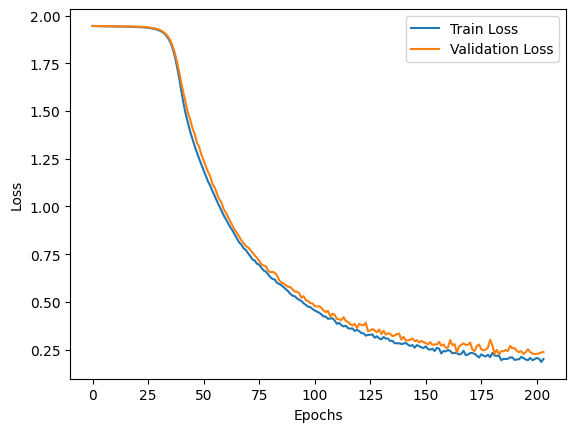

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Data/ObesityDataSet_raw_and_data_sinthetic_shuffled.csv"
important_columns = ['Gender', 'Height', 'Weight', 'family_history_with_overweight',
                    'FAVC', 'CAEC', 'CALC', 'MTRANS']

X, y, scaler, encoder, label_encoder = load_and_preprocess_data_with_BMI(path, important_columns)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


layer_dims = [X_train.shape[1], 64, 32, y_train.shape[1]]
activations = ["relu","relu", "softmax"]
model = MLP(layer_dims, activations, learning_rate=0.01, lambd=0.01, keep_probs=[0.8,0.9])

train_loss_history, val_loss_history = model.train(X_train, y_train, X_val, y_val, epochs=1000, batch_size=16, early_stop_patience=20)
plot_losses(train_loss_history, val_loss_history)



In [ ]:
from sklearn.metrics import classification_report
model.load_model("/content/drive/MyDrive/Colab Notebooks/Modal/Multiple_peceptron.pkl")
y_test_pred = model.predict(X_test)
y_test_true = np.argmax(y_test, axis=1)
print("\nClassification Report:")
print(classification_report(y_test_true, y_test_pred, target_names=label_encoder.categories_[0]))


Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.91      0.93        35
      Normal_Weight       0.90      0.90      0.90        50
     Obesity_Type_I       0.95      0.95      0.95        58
    Obesity_Type_II       0.90      0.95      0.93        40
   Obesity_Type_III       1.00      0.98      0.99        61
 Overweight_Level_I       0.87      0.89      0.88        37
Overweight_Level_II       0.94      0.92      0.93        36

           accuracy                           0.93       317
          macro avg       0.93      0.93      0.93       317
       weighted avg       0.93      0.93      0.93       317



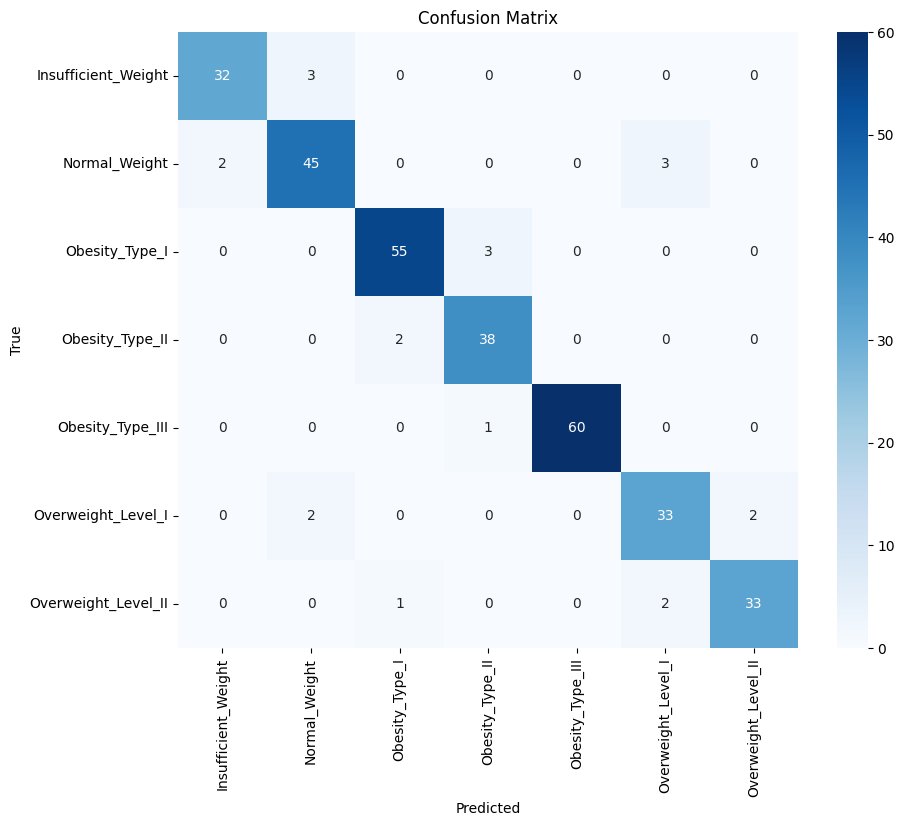

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
cm = confusion_matrix(y_test_true, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.categories_[0], yticklabels=label_encoder.categories_[0])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def test_model(model, new_data, important_columns, encoder, scaler, label_encoder):
    test_data = pd.DataFrame([new_data])

    test_data['BMI'] = test_data['Weight'] / (test_data['Height'] ** 2)
    test_data = test_data[important_columns + ['BMI']]

    categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'CALC', 'MTRANS']
    encoded_cats = encoder.transform(test_data[categorical_columns])
    encoded_cat_columns = encoder.get_feature_names_out(categorical_columns)
    encoded_df = pd.DataFrame(encoded_cats, columns=encoded_cat_columns)

    test_data = pd.concat([test_data.drop(columns=categorical_columns), encoded_df], axis=1)

    X_test = test_data.values
    X_test = scaler.transform(X_test)

    prediction = model.predict(X_test)
    predicted_label = label_encoder.categories_[0][prediction[0]]

    return predicted_label


path = "/content/drive/MyDrive/Colab Notebooks/Data/ObesityDataSet_raw_and_data_sinthetic_shuffled.csv"
important_columns = ['Gender', 'Height', 'Weight', 'family_history_with_overweight',
                    'FAVC', 'CAEC', 'CALC', 'MTRANS']

X, y, scaler, encoder, label_encoder = load_and_preprocess_data_with_BMI(path, important_columns)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

layer_dims = [X_train.shape[1], 64, 32, y_train.shape[1]]
activations = ["relu","relu", "softmax"]
model = MLP(layer_dims, activations, learning_rate=0.01, lambd=0.01, keep_probs=[0.8,0.9])
model.load_model("/content/drive/MyDrive/Colab Notebooks/Modal/Multiple_peceptron.pkl")



In [ ]:

new_data = {
        'Gender': 'Male',
        'family_history_with_overweight': 'yes',
        'FAVC': 'yes',
        'CAEC': 'Always',
        'SMOKE': 'no',
        'SCC': 'no',
        'CALC': 'Always',
        'MTRANS': 'Bike',
        'Age': 20,
        'Height': 1.63,
        'Weight': 55.0,
        'FCVC': 1.0,
        'NCP': 5.0,
        'CH2O': 0.5,
        'FAF': 0.2,
        'TUE': 0.1
    }
predicted_label = test_model(model, new_data, important_columns, encoder, scaler, label_encoder)
print(f"Predicted Label: {predicted_label}")

Predicted Label: Normal_Weight


In [ ]:

examples = [

    {
        'Gender': 'Female',
        'family_history_with_overweight': 'no',
        'FAVC': 'no',
        'CAEC': 'Sometimes',
        'SMOKE': 'no',
        'SCC': 'no',
        'CALC': 'no',
        'MTRANS': 'Walking',
        'Age': 22,
        'Height': 1.75,
        'Weight': 50.0,
        'FCVC': 3.0,
        'NCP': 1.5,
        'CH2O': 2.5,
        'FAF': 1.5,
        'TUE': 1.0
    },

    {
        'Gender': 'Male',
        'family_history_with_overweight': 'no',
        'FAVC': 'no',
        'CAEC': 'Sometimes',
        'SMOKE': 'no',
        'SCC': 'no',
        'CALC': 'no',
        'MTRANS': 'Public_Transportation',
        'Age': 28,
        'Height': 1.80,
        'Weight': 70.0,
        'FCVC': 3.0,
        'NCP': 2.0,
        'CH2O': 2.0,
        'FAF': 2.0,
        'TUE': 1.0
    },

    {
        'Gender': 'Female',
        'family_history_with_overweight': 'yes',
        'FAVC': 'yes',
        'CAEC': 'Sometimes',
        'SMOKE': 'no',
        'SCC': 'no',
        'CALC': 'Sometimes',
        'MTRANS': 'Public_Transportation',
        'Age': 35,
        'Height': 1.65,
        'Weight': 68.0,
        'FCVC': 2.0,
        'NCP': 3.0,
        'CH2O': 2.0,
        'FAF': 0.5,
        'TUE': 0.8
    },
    {
        'Gender': 'Male',
        'family_history_with_overweight': 'yes',
        'FAVC': 'yes',
        'CAEC': 'Frequently',
        'SMOKE': 'no',
        'SCC': 'yes',
        'CALC': 'Frequently',
        'MTRANS': 'Motorbike',
        'Age': 40,
        'Height': 1.75,
        'Weight': 82.0,
        'FCVC': 1.5,
        'NCP': 3.5,
        'CH2O': 1.0,
        'FAF': 0.8,
        'TUE': 0.5
    },

    {
        'Gender': 'Female',
        'family_history_with_overweight': 'yes',
        'FAVC': 'yes',
        'CAEC': 'Always',
        'SMOKE': 'no',
        'SCC': 'yes',
        'CALC': 'Frequently',
        'MTRANS': 'Motorbike',
        'Age': 45,
        'Height': 1.60,
        'Weight': 90.0,
        'FCVC': 1.0,
        'NCP': 4.0,
        'CH2O': 1.0,
        'FAF': 0.5,
        'TUE': 0.2
    },
    {
        'Gender': 'Male',
        'family_history_with_overweight': 'yes',
        'FAVC': 'yes',
        'CAEC': 'Always',
        'SMOKE': 'no',
        'SCC': 'no',
        'CALC': 'Always',
        'MTRANS': 'Bike',
        'Age': 21,
        'Height': 1.60,
        'Weight': 130,
        'FCVC': 1.0,
        'NCP': 5.0,
        'CH2O': 0.5,
        'FAF': 0.2,
        'TUE': 0.1
    },
    {
        'Gender': 'Female',
        'family_history_with_overweight': 'yes',
        'FAVC': 'yes',
        'CAEC': 'Always',
        'SMOKE': 'no',
        'SCC': 'no',
        'CALC': 'Always',
        'MTRANS': 'Walking',
        'Age': 55,
        'Height': 1.50,
        'Weight': 150.0,
        'FCVC': 0.5,
        'NCP': 6.0,
        'CH2O': 0.3,
        'FAF': 0.0,
        'TUE': 0.0
    }
]

for i, data in enumerate(examples):
    predicted_label = test_model(model, data, important_columns, encoder, scaler, label_encoder)
    print(f"Ví dụ {i + 1}: {data}")
    print(f"Dự đoán nhãn: {predicted_label}\n")



Ví dụ 1: {'Gender': 'Female', 'family_history_with_overweight': 'no', 'FAVC': 'no', 'CAEC': 'Sometimes', 'SMOKE': 'no', 'SCC': 'no', 'CALC': 'no', 'MTRANS': 'Walking', 'Age': 22, 'Height': 1.75, 'Weight': 50.0, 'FCVC': 3.0, 'NCP': 1.5, 'CH2O': 2.5, 'FAF': 1.5, 'TUE': 1.0}
Dự đoán nhãn: Insufficient_Weight

Ví dụ 2: {'Gender': 'Male', 'family_history_with_overweight': 'no', 'FAVC': 'no', 'CAEC': 'Sometimes', 'SMOKE': 'no', 'SCC': 'no', 'CALC': 'no', 'MTRANS': 'Public_Transportation', 'Age': 28, 'Height': 1.8, 'Weight': 70.0, 'FCVC': 3.0, 'NCP': 2.0, 'CH2O': 2.0, 'FAF': 2.0, 'TUE': 1.0}
Dự đoán nhãn: Normal_Weight

Ví dụ 3: {'Gender': 'Female', 'family_history_with_overweight': 'yes', 'FAVC': 'yes', 'CAEC': 'Sometimes', 'SMOKE': 'no', 'SCC': 'no', 'CALC': 'Sometimes', 'MTRANS': 'Public_Transportation', 'Age': 35, 'Height': 1.65, 'Weight': 68.0, 'FCVC': 2.0, 'NCP': 3.0, 'CH2O': 2.0, 'FAF': 0.5, 'TUE': 0.8}
Dự đoán nhãn: Overweight_Level_I

Ví dụ 4: {'Gender': 'Male', 'family_history_with_

In [ ]:
def input_data():
    data = {
        'Gender': input("Gender (Male/Female): "),
        'family_history_with_overweight': input("Family history with overweight (yes/no): "),
        'FAVC': input("Frequent high caloric food consumption (yes/no): "),
        'CAEC': input("Eating behavior (Always/Sometimes/Frequently/Never): "),
        'SMOKE': input("Do you smoke? (yes/no): "),
        'SCC': input("Do you monitor your calories? (yes/no): "),
        'CALC': input("Alcohol consumption (Always/Sometimes/Frequently/Never): "),
        'MTRANS': input("Transportation method (Bike/Public/Walking/Car/Motorbike): "),
        'Age': float(input("Age: ")),
        'Height': float(input("Height (in meters): ")),
        'Weight': float(input("Weight (in kg): ")),
        'FCVC': float(input("Frequency of vegetable consumption (1.0 to 3.0): ")),
        'NCP': float(input("Number of main meals (1.0 to 5.0): ")),
        'CH2O': float(input("Daily water consumption (0.5 to 3.0): ")),
        'FAF': float(input("Physical activity frequency (0.0 to 2.5): ")),
        'TUE': float(input("Time using technology devices daily (0.0 to 2.0): "))
    }
    return data


print("Nhập dữ liệu để kiểm tra dự đoán mô hình:")
new_data = input_data()

predicted_label = test_model(model, new_data, important_columns, encoder, scaler, label_encoder)
print(f"\nPredicted Label: {predicted_label}")


Nhập dữ liệu để kiểm tra dự đoán mô hình:
Gender (Male/Female): Female
Family history with overweight (yes/no): yes
Frequent high caloric food consumption (yes/no): no
Eating behavior (Always/Sometimes/Frequently/Never): Always
Do you smoke? (yes/no): yes
Do you monitor your calories? (yes/no): no
Alcohol consumption (Always/Sometimes/Frequently/Never): Never
Transportation method (Bike/Public/Walking/Car/Motorbike): Car
Age: 34
Height (in meters): 1.6
Weight (in kg): 120
Frequency of vegetable consumption (1.0 to 3.0): 2
Number of main meals (1.0 to 5.0): 2
Daily water consumption (0.5 to 3.0): 1
Physical activity frequency (0.0 to 2.5): 2
Time using technology devices daily (0.0 to 2.0): 1

Predicted Label: Obesity_Type_III
